# Project One Draft

## Hello, I'm the problem.

    Critics of the film industry often say that ingenuity is effectively non-existent in the current market- often placing the last decade of unique content in the 1980's or 1990's. (quotes and sources here) Others may contribute this rhetoric to nostalgia, or a more critical audience than 20+ years ago. (more quotes and sources)

##### With the available data, I'd like to try to quantify these different outlooks to see if we can answer some of the following questions:

- **How have the projects built by the movie industry evolved over the last 24 years?**
    - Do any of those changes correlate with profitability? 
- **What patterns exist in consumers film ratings?** 
    - Are there prefered genres? 
    - Are profits higher on higher rated films? 
    - Do consumers show a motivation to vote based on film? Or are they motivated to vote by how much or how little they enjoy the film?
- **Over the last 24 years, are consumers becoming more or less critical of the projects being released?**
    - Have the frequency of certain ratings changed over time? 



## Hello, I'm the data.
You can view the dataset I'm utilizing <a href="https://www.kaggle.com/datasets/aditya126/movies-box-office-dataset-2000-2024?resource=download" target="_blank"> here </a>. 

   - This data-set is developed from public open sources. 
   - It provides information about globally-released films only. This means films examined are unlikely to be independent projects, therefore this research does not reflect any patterns occuring in niche markets. Exploring engagement in other markets would make for an excellent follow-up to this research to truly decide whether consumers are more or less engaged with creatively-lead projects.
   - The data explores the time period between 2000 and 2024. Our analysis will only apply to changes in the industry over the last 24 years, therefore the 'nostalgia' effect on audiences may be impossible to assess. 

##### This data-set contains the following features:
- Rank: a global ranking of the movie based on worldwide box office revenue.
- Release Group: The title of the movie or film series. 
- \$Worldwide: total worldwide box office revenue for the movie. Dollar sign is assumed to be USD, but not explicitly stated. 
- Domestic %: percentage of worldwide revenue generated domestically.
- \$Domestic: total domestic box office revenue.
- Foreign %: percentage of worldwide revenue generated in foreign markets. 
- \$Foreign: total foreign box office revenue.
- Year: the release year of the movie.
- Genres: the genre associated with the movie.
- Rating: average audience rating from TMDB. 
- Vote_count: the number of votes the movie received on TMDB.
- Original_Language: the primary language of the movie.
- Production_Country: the country where the movie was produced.

## The process before the process.

**Installing then importing the libraries we'll use :**

In [68]:
!pip install pandas matplotlib seaborn

In [41]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

**Importing and reviewing the raw data:**
- using pandas read_csv method to turn this csv into a dataframe
- inspecting the first five rows
- reviewing data types
- reviewing the names of columns
- using the shape method to evaluate the size of the dataframe
- calling the describe method to provide general statistics on numerical values
- assessing missing values

In [8]:
raw_movie_df = pd.read_csv('enhanced_box_office_data(2000-2024)u.csv')
raw_movie_df.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [11]:
raw_movie_df.columns

Index(['Rank', 'Release Group', '$Worldwide', '$Domestic', 'Domestic %',
       '$Foreign', 'Foreign %', 'Year', 'Genres', 'Rating', 'Vote_Count',
       'Original_Language', 'Production_Countries'],
      dtype='object')

In [13]:
raw_movie_df.dtypes

Rank                      int64
Release Group            object
$Worldwide              float64
$Domestic               float64
Domestic %              float64
$Foreign                float64
Foreign %               float64
Year                      int64
Genres                   object
Rating                   object
Vote_Count              float64
Original_Language        object
Production_Countries     object
dtype: object

In [15]:
raw_movie_df.shape

(5000, 13)

In [17]:
raw_movie_df.describe()

,Rank,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Vote_Count
count,5000.00000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,4830.000000
mean,100.50000,1.192137e+08,4.472523e+07,35.740620,7.448809e+07,64.256640,2012.000000,2531.585921
std,57.74008,2.005243e+08,7.727026e+07,30.656992,1.334932e+08,30.654531,7.211824,3946.272827
min,1.00000,1.666028e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2000.000000,0.000000
25%,50.75000,2.466220e+07,9.275150e+04,0.200000,1.371034e+07,42.200000,2006.000000,205.250000
50%,100.50000,4.844658e+07,1.798421e+07,37.050000,3.019444e+07,62.950000,2012.000000,1035.500000
75%,150.25000,1.197588e+08,5.386847e+07,57.800000,7.211578e+07,99.800000,2018.000000,3065.000000
max,200.00000,2.799439e+09,9.366622e+08,100.000000,1.993811e+09,100.000000,2024.000000,36753.000000


In [19]:
raw_movie_df.isnull().sum()

Rank                      0
Release Group             0
$Worldwide                0
$Domestic                 0
Domestic %                0
$Foreign                  0
Foreign %                 0
Year                      0
Genres                  178
Rating                  170
Vote_Count              170
Original_Language       170
Production_Countries    200
dtype: int64

**Observations of Interest**
- This database contains 5000 records and only 200 of them have at least one missing values, this gives us a lot of data to work with if we want to ignore those records, but before I make that decision I would like to see which of the movies are missing what values. If all of them are from a certain release year, we might be in trouble with our time series analysis. 
- Out of those 5000 records all of them provide release year and the information relevant to their revenue.
- The maximum worldwide revenue is close to 2.8 billion dollars, and the minimum is close to 1.7 million dollars.
- There exists at least one film whose entire revenue was generated in foreign markets and one film whose revenue was generated entirely domestically.
- There are 5000 entries for rank, yet the max value is reported to be 200. This tells us that either there are several valid 'ties' in rank, or this value has some flaw in it.
- Ratings are formatted as "object" data types, therefore it's not currently possible to inspect the descriptive statistics of this value. 

**Next areas of interest**
- What movies are reported as min and max in worldwide revenue?
- In records with missing values, are there commonly shared characteristics?
- I will separate the numerator of rating using a delimiter of "/" and assign those values to a new column with a float data type to examine it more closely.
- Understanding the demographic of TMDB users would also be an important next step if that information is available so that I know who makes up our population for consumer analysis.
- Determine if the 'rank' column is meaningful, or if the data is noisy.
- Decide what features are meaningful and subset the dataframe to include only the meaningful columns, then reasses missingness.
- I likely also have to deliminate the Genre column to better asses the frequency of each movie genre as intended, since each film can fall under multiple genres, unless they are written in a perfectly ordered list for each value.

**For the sake of meeting the brief of the assignment in the time that I have available immediately, I'll be exploring release year with foreign and domestic market %.** 
This is not one of the questions that I originally planned to ask, but since the data is available and I need to look up more delimiting methods to find insight in the areas I was curious about I'm letting the data lead to the question.
1. First subset the data I need from these columns to create a new database
2. Examine the visuals

In [35]:
sub1_movie_df = raw_movie_df[['Year','Foreign %','Domestic %']]
sub1_movie_df.head()

,Year,Foreign %,Domestic %
0,2000,60.6,39.4
1,2000,59.2,40.8
2,2000,45.6,54.4
3,2000,51.1,48.9
4,2000,60.6,39.4


## Data Understanding/Visualization 

Using myplotlib I'll create a simple scaatter plot using year as my x-value and the market % data as my y values.

<Axes: title={'center': 'Foreign % of Market Share from 2000-2024'}, xlabel='Year', ylabel='Foreign %'>

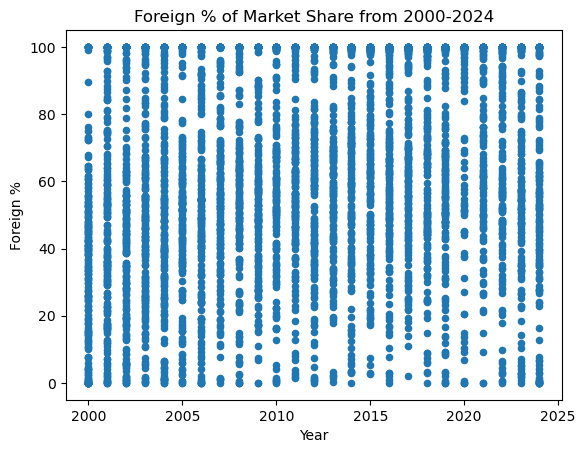

In [49]:
sub1_movie_df.plot(x='Year',y='Foreign %', title= 'Foreign % of Market Share from 2000-2024', kind='scatter')

<Axes: title={'center': 'Domestic % of Market Share from 2000-2024'}, xlabel='Year', ylabel='Domestic %'>

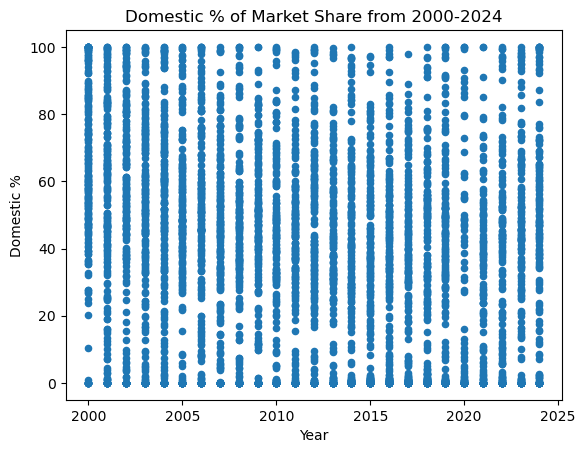

In [51]:
sub1_movie_df.plot(x='Year',y='Domestic %', title= 'Domestic % of Market Share from 2000-2024', kind='scatter')

## Storytelling

##### Well...
I have to say that told me approximately zero information about trends in the data. That being said, if I did it all over again I'd explore a central tendency of market share % for each year, because with this many values with such a high variation I can't really assume any insight from this. 
That being said, 2020 is observably sparse compare to the other years which supports what we could all probably assume from experience- not as many films were released in 2020 as other years. 

## Impact
This is a **rough** draft. Emphasis on the _rough_. I don't think the impact is far reaching, so let's revisit this together when I've spent hours pre-processing and delimiting data, okay? Okay. 

## References
ChatGPT provided a template for opening a link in a new tab in html in a markdown cell in Jupyter Notebook. 